In [75]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pathlib import Path

current_dir = Path(".").resolve()
project_dir = current_dir.parent


In [76]:
file_data = os.path.join(project_dir,"data", "UCI_Credit_Card.csv")
df = pd.read_csv(file_data)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [77]:
for col in df.columns:
    print(col, df[col].isna().sum())

ID 0
LIMIT_BAL 0
SEX 0
EDUCATION 0
MARRIAGE 0
AGE 0
PAY_0 0
PAY_2 0
PAY_3 0
PAY_4 0
PAY_5 0
PAY_6 0
BILL_AMT1 0
BILL_AMT2 0
BILL_AMT3 0
BILL_AMT4 0
BILL_AMT5 0
BILL_AMT6 0
PAY_AMT1 0
PAY_AMT2 0
PAY_AMT3 0
PAY_AMT4 0
PAY_AMT5 0
PAY_AMT6 0
default.payment.next.month 0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [79]:
x = df.loc[:,"LIMIT_BAL":"PAY_AMT6"]
y = df.loc[:,"default.payment.next.month"]

In [80]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [81]:
print("X shape:", x.shape)
print("X shape:", y.shape)

X shape: (30000, 23)
X shape: (30000,)


In [82]:
# Se dividen los datos para realizar el entreno y la prubea del modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

<AxesSubplot:>

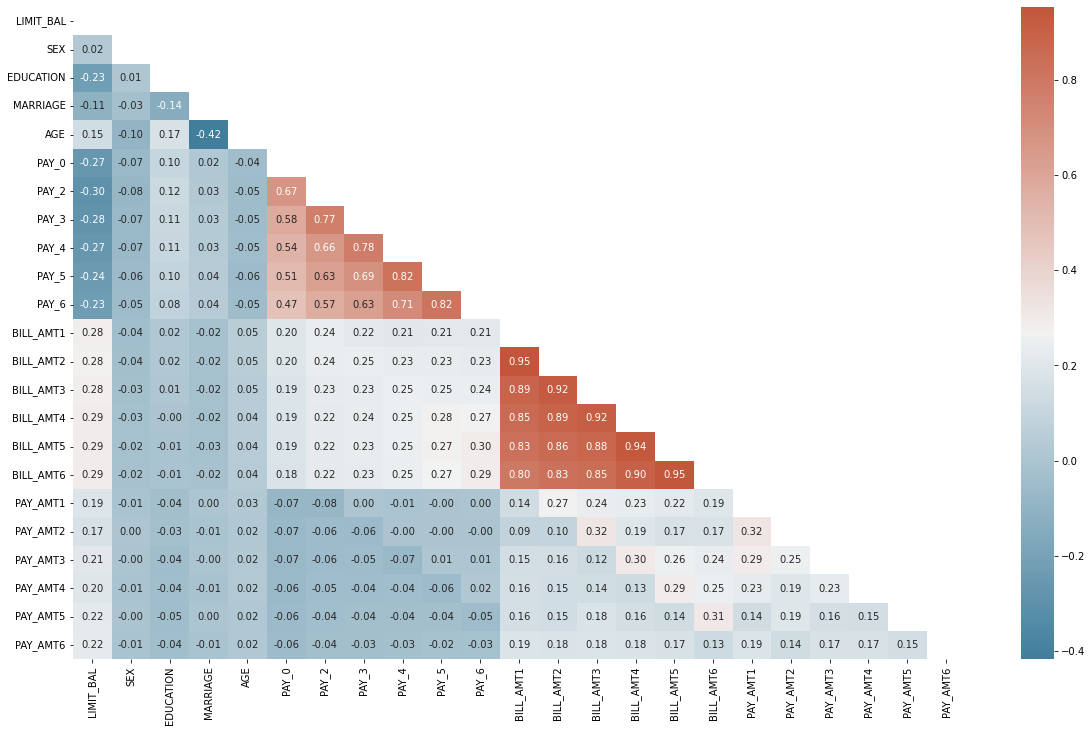

In [83]:
#Se realiza la grafica de correlación de las variables
plt.figure(figsize =(20,12))

corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask = mask,
    cmap = cmap,
    annot = True,
    fmt = ".2f"
)

In [84]:
# Se eliminan las variables con la correlación mas alta para dejar solo las que se necesitan
coor_matrix = corr_matrix.abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in  tri_df.columns if any(tri_df[x]>0.9)]

X_train = X_train.drop(to_drop, axis=1)

X_test = X_test.drop(to_drop, axis = 1)

In [85]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,240000.0,2,1,1,40,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27622,50000.0,2,1,2,23,-1,-1,-1,-1,-1,-1,660.0,2548.0,2321.0,4800.0,9810.0,660.0,2980.0
28376,50000.0,2,2,1,36,2,2,2,2,0,0,35126.0,0.0,4700.0,0.0,2004.0,3500.0,0.0
10917,200000.0,2,3,1,54,6,5,4,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27234,240000.0,1,1,1,35,-1,-1,-1,0,-1,-1,22659.0,2017.0,21817.0,1120.0,13434.0,22772.0,22820.0


In [86]:
y_train.head()

28465    1
27622    0
28376    0
10917    0
27234    0
Name: default.payment.next.month, dtype: int64

In [87]:
# Se escalan los datos con el fin que las distancias entre los numeros de las variables no sean tan altas
from sklearn.preprocessing import StandardScaler #Toma el promedio y resta la media con la desviación estandar

sc =StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

print("X_train shape", X_train_scaled.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_scaled.shape)
print("y_test shape", y_test.shape)

X_train shape (21000, 18)
y_train shape (21000,)
X_test shape (9000, 18)
y_test shape (9000,)


In [88]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [89]:
pca.explained_variance_ratio_

array([0.2534993 , 0.13721377, 0.08458319, 0.0592855 , 0.05621995,
       0.05072005, 0.04931688, 0.0464582 , 0.04181132, 0.03842262,
       0.03707505, 0.03546437, 0.03092692, 0.02526323, 0.02171102])

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

print (np.unique(y_train,    return_counts=True))
print (np.unique(y_train_enc,return_counts=True))

(array([0, 1]), array([16324,  4676]))
(array([0, 1]), array([16324,  4676]))


In [91]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

96.79713899372003

In [92]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train_enc)

SVC(random_state=42)

In [93]:
svc.fit(X_train_pca, y_train_enc)

SVC(random_state=42)

In [94]:
y_pred =svc.predict(X_test_pca)

In [95]:
from sklearn.metrics import classification_report

print(
    classification_report(y_test_enc, y_pred)
)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [96]:
svc.predict(X_test_pca[10].reshape(1,-1))

array([1])

In [97]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
y_test_enc

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10).split(X_train_pca, y_train_enc)

scores = list()

for k, (train, test) in enumerate(kfold):
    svc.fit(X_train_pca[train], y_train_enc[train])
    
    score = svc.score(X_train_pca[test], y_train_enc[test])
    scores.append(score)
    
    print('Fold: {}, Class dist.: {}, Acc: {}'.format(k+1, np.bincount(y_train_enc[train]), score) )

print('CV accuracy: {} +/- {}'.format(
    np.round(np.mean(scores), 2),
    np.round(np.std(scores), 2)
))

Fold: 1, Class dist.: [14692  4208], Acc: 0.8176190476190476
Fold: 2, Class dist.: [14692  4208], Acc: 0.8228571428571428
Fold: 3, Class dist.: [14692  4208], Acc: 0.8242857142857143
Fold: 4, Class dist.: [14692  4208], Acc: 0.8166666666666667
Fold: 5, Class dist.: [14692  4208], Acc: 0.8119047619047619
Fold: 6, Class dist.: [14692  4208], Acc: 0.8314285714285714
Fold: 7, Class dist.: [14691  4209], Acc: 0.819047619047619
Fold: 8, Class dist.: [14691  4209], Acc: 0.8085714285714286
Fold: 9, Class dist.: [14691  4209], Acc: 0.8180952380952381
Fold: 10, Class dist.: [14691  4209], Acc: 0.8104761904761905
CV accuracy: 0.82 +/- 0.01


In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    estimator=svc,
    X = X_train_pca,
    y=y_train_enc,
    cv = 10,
    n_jobs = 1
)

print ("CV accurancy: {} +/- {}".format(
    np.round(np.mean(scores), 2 ),
    np.round(np.std(scores), 2)
))

CV accurancy: 0.82 +/- 0.01


In [101]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svc,
    X=X_train_pca,
    y=y_train_enc,
    train_sizes = np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=1
    
)

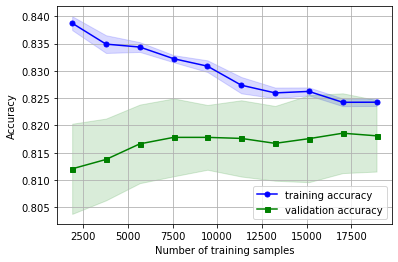

In [102]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

test_mean  = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

test_mean  = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

# REGRESION LOGISTICA

In [103]:
#Se generan listas para poder dividir las variables X y Y
bank_data_vars = df.columns.values.tolist()
y = ["default.payment.next.month"]

In [104]:
x = [v for v in df if v not in y]

In [105]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [106]:
# Se escalan los datos con el fin que las distancias entre los numeros de las variables no sean tan altas
from sklearn.preprocessing import StandardScaler #Toma el promedio y resta la media con la desviación estandar

sc =StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

print("X_train shape", X_train_scaled.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_scaled.shape)
print("y_test shape", y_test.shape)

X_train shape (21000, 18)
y_train shape (21000,)
X_test shape (9000, 18)
y_test shape (9000,)


In [107]:
#Elijo el numero de variables que me quiero quedar las cuales usare para el modelo
n=5

In [108]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=1000)

In [109]:
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(df[x], df[y].values.ravel())

In [110]:
print(rfe.support_)

[False False  True False  True False  True  True  True False False False
 False False False False False False False False False False False False]


In [111]:
print(rfe.ranking_)

[16 15  1  2  1  6  1  1  1  5  3  4  9 10 19 20 14 18  7  8 12 11 13 17]


In [112]:
# Elijo las variables que sean = a 1
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)
list(z)

[('ID', False, 16),
 ('LIMIT_BAL', False, 15),
 ('SEX', True, 1),
 ('EDUCATION', False, 2),
 ('MARRIAGE', True, 1),
 ('AGE', False, 6),
 ('PAY_0', True, 1),
 ('PAY_2', True, 1),
 ('PAY_3', True, 1),
 ('PAY_4', False, 5),
 ('PAY_5', False, 3),
 ('PAY_6', False, 4),
 ('BILL_AMT1', False, 9),
 ('BILL_AMT2', False, 10),
 ('BILL_AMT3', False, 19),
 ('BILL_AMT4', False, 20),
 ('BILL_AMT5', False, 14),
 ('BILL_AMT6', False, 18),
 ('PAY_AMT1', False, 7),
 ('PAY_AMT2', False, 8),
 ('PAY_AMT3', False, 12),
 ('PAY_AMT4', False, 11),
 ('PAY_AMT5', False, 13),
 ('PAY_AMT6', False, 17)]

In [113]:
# Genero una variable con las variables que quiero quedarme para el modelo
cols = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3"]

In [114]:
X = df[cols]
Y = df["default.payment.next.month"]

In [115]:
import statsmodels.api as sm

In [116]:
logit_model = sm.Logit(Y, X)

In [117]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.473220
         Iterations 6


In [118]:
from sklearn import linear_model

In [119]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [120]:
#Revisar el porcentaje de eficiencia del modelo
logit_model.score(X,Y)

0.8093333333333333

In [121]:
#Revisar los coeficientes exactos por columnas
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,SEX,[-0.10564114797989922]
1,EDUCATION,[-0.052838483906042684]
2,MARRIAGE,[-0.12962305885583095]
3,AGE,[0.004577302987444903]
4,PAY_0,[0.6183546436422283]
5,PAY_2,[0.09318817663058206]
6,PAY_3,[0.11666607214191971]


In [122]:
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Latex


In [123]:
#Entrenar el modelo, se divide en conjunto de entrenamiento y en conjunto de testeo,test_size tamaño del conjunto de testeo, random_state semilla de división aleatoria
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [124]:
#Se realiza el entrenamiento
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [125]:
#Obtener las probabilidades del modelo del conjunto de testeo, si la probabilidad es mayor a 0.5 se considera compra y si es menor venta en este caso

probs = lm.predict_proba(X_test)
probs

array([[0.5614    , 0.4386    ],
       [0.7782982 , 0.2217018 ],
       [0.70856699, 0.29143301],
       ...,
       [0.7863997 , 0.2136003 ],
       [0.94202704, 0.05797296],
       [0.80481557, 0.19518443]])

In [126]:
#La probabilidad es todas las probabilidades pero solo la primera columna, se hace un dataframe con las probabilidades y se hace un threshold
#Que toda Predicción que sea superior al threshold se cataloga como compra y de lo contrario como venta

prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.438600,1
1,0.221702,1
2,0.291433,1
3,0.232829,1
4,0.050144,0


In [127]:
#Se hace un conteo de cuantos marco como compradores y cuantos no
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1404
1,7596


In [128]:
#El porcentaje que se considera comprador
7596/len(prob_df)*100

84.39999999999999

In [129]:
#Si se aumenta el threshold nos da que el modelo se vueve menos permisivo
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,2489
1,6511


In [130]:
6511/len(prob_df)*100

72.34444444444445

In [131]:
#Si se baja el threshold nos da que el modelo se vueve mas agresivo

threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,423
1,8577


In [132]:
#Se estima que el modelo con el 0.05 de treshold es mas eficaz
8577/len(prob_df)*100

95.3

In [133]:
from sklearn import metrics

In [134]:
prediction = lm.predict_proba(X_test)

In [135]:
#Validación cruzada realiza una tecnica de validar varias veces con diferentes variables y sacar la media para calcular la eficacia del modelo
from sklearn.model_selection import cross_val_score

In [136]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [137]:
scores

array([0.80166667, 0.80133333, 0.81      , 0.80266667, 0.81133333,
       0.81066667, 0.81966667, 0.80833333, 0.811     , 0.813     ])

In [138]:
scores.mean()

0.8089666666666666

In [139]:
#Con las curvas ROC se evalua si el modelo es correcta o es incorrecta y esto se da comprando el modelo con el valor actual

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [140]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [141]:
probs = lm.predict_proba(X_test)

In [142]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.438600,1,0
1,0.221702,1,0
2,0.291433,1,0
3,0.232829,1,0
4,0.050144,0,0


In [143]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [144]:
confusion_matrix

actual,0,1
prediction,,
0,1218,186
1,5842,1754


In [145]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [146]:
#Se define la sensibilidad del modelo 
sens = TP/(TP+FN)
sens

0.23091100579252238

In [147]:
#Se hace un ciclo for con varios thresholds para revisar diferentes validaciones del modelo

thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [148]:
sensitivities

[1,
 0.9974226804123711,
 0.9685567010309278,
 0.9448453608247422,
 0.9041237113402062,
 0.8489690721649484,
 0.8201030927835051,
 0.7675257731958763,
 0.6778350515463918,
 0.4747422680412371,
 0.44742268041237115,
 0.3829896907216495,
 0.2134020618556701,
 0]

In [149]:
especifities_1

[1,
 0.9968838526912182,
 0.9487252124645892,
 0.8981586402266288,
 0.8274787535410765,
 0.7475920679886685,
 0.6968838526912181,
 0.5960339943342776,
 0.4172804532577904,
 0.12053824362606236,
 0.0851274787535411,
 0.05552407932011327,
 0.022237960339943297,
 0]

Text(0.5, 1.0, 'Curva ROC')

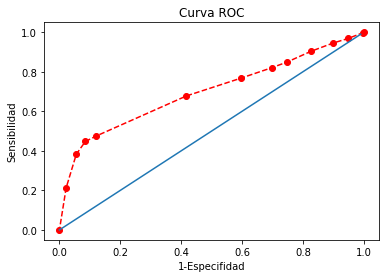

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

# ARBOL DE DESICIÓN

In [151]:
current_dir = Path(".").resolve()
project_dir = current_dir.parent


In [152]:

file_data = os.path.join(project_dir,"data", "UCI_Credit_Card.csv")
df_2 = pd.read_csv(file_data)
df_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [153]:
x2 = df_2.loc[:,"LIMIT_BAL":"PAY_AMT6"]
y2 = df_2.loc[:,"default.payment.next.month"]

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 42)

<AxesSubplot:>

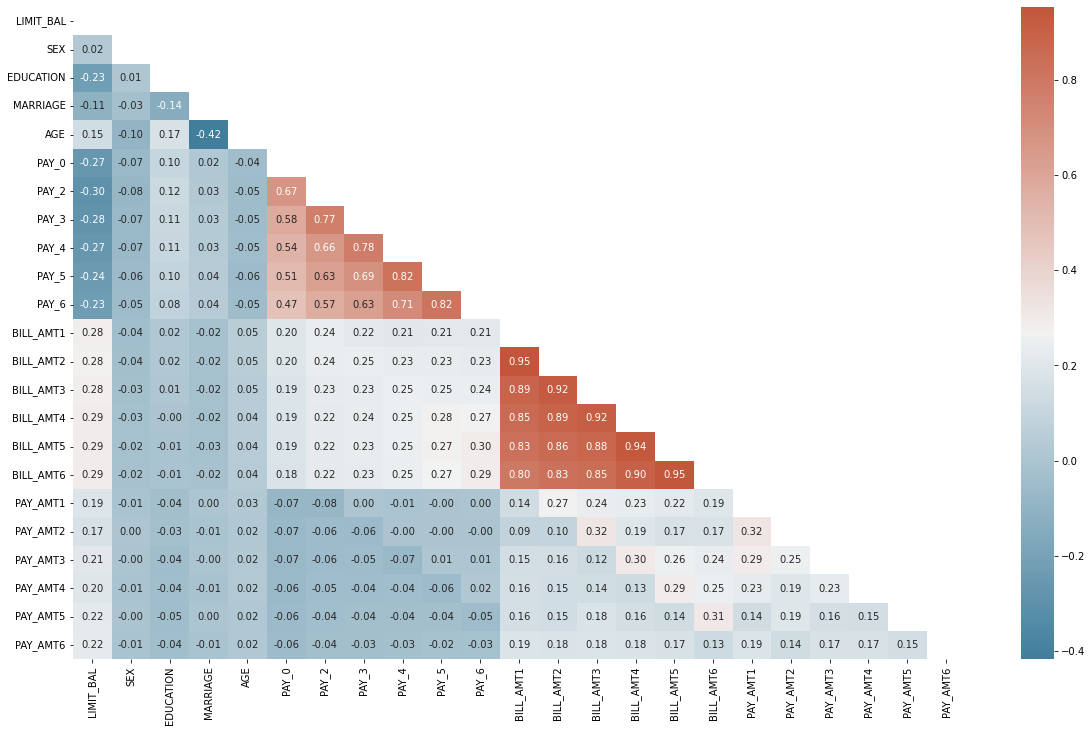

In [155]:
plt.figure(figsize =(20,12))

corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask = mask,
    cmap = cmap,
    annot = True,
    fmt = ".2f"
)

In [156]:
coor_matrix = corr_matrix.abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in  tri_df.columns if any(tri_df[x]>0.9)]

X_train = X_train.drop(to_drop, axis=1)

X_test = X_test.drop(to_drop, axis = 1)

In [157]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,240000.0,2,1,1,40,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27622,50000.0,2,1,2,23,-1,-1,-1,-1,-1,-1,660.0,2548.0,2321.0,4800.0,9810.0,660.0,2980.0
28376,50000.0,2,2,1,36,2,2,2,2,0,0,35126.0,0.0,4700.0,0.0,2004.0,3500.0,0.0
10917,200000.0,2,3,1,54,6,5,4,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27234,240000.0,1,1,1,35,-1,-1,-1,0,-1,-1,22659.0,2017.0,21817.0,1120.0,13434.0,22772.0,22820.0


In [158]:
from sklearn.preprocessing import StandardScaler #Toma el promedio y resta la media con la desviación estandar

sc =StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

print("X_train shape", X_train_scaled.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_scaled.shape)
print("y_test shape", y_test.shape)

X_train shape (21000, 18)
y_train shape (21000,)
X_test shape (9000, 18)
y_test shape (9000,)


In [159]:
#Entrenar  con la posicion ya que tiene varios valores esa columna osea no es ordinal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X_train.loc[:,["LIMIT_BAL"]])
le2 = LabelEncoder()
le2.fit(X_train.loc[:,["SEX"]])
le3 = LabelEncoder()
le3.fit(X_train.loc[:,["MARRIAGE"]])
le4 = LabelEncoder()
le4.fit(X_train.loc[:,["AGE"]])
le5 = LabelEncoder()
le5.fit(X_train.loc[:,["BILL_AMT6"]])
le6 = LabelEncoder()
le6.fit(X_train.loc[:,["PAY_AMT1"]])
le7 = LabelEncoder()
le7.fit(X_train.loc[:,["PAY_AMT2"]])
le8 = LabelEncoder()
le8.fit(X_train.loc[:,["PAY_AMT4"]])
le9 = LabelEncoder()
le9.fit(X_train.loc[:,["PAY_AMT5"]])
le10 = LabelEncoder()
le10.fit(X_train.loc[:,["PAY_AMT6"]])
le11 = LabelEncoder()
le11.fit(X_train.loc[:,["PAY_AMT3"]])


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [160]:
print(le.classes_)
print(le2.classes_)
print(le3.classes_)
print(le4.classes_)
print(le5.classes_)
print(le6.classes_)
print(le7.classes_)
print(le8.classes_)
print(le9.classes_)
print(le10.classes_)
print(le11.classes_)

[  10000.   16000.   20000.   30000.   40000.   50000.   60000.   70000.
   80000.   90000.  100000.  110000.  120000.  130000.  140000.  150000.
  160000.  170000.  180000.  190000.  200000.  210000.  220000.  230000.
  240000.  250000.  260000.  270000.  280000.  290000.  300000.  310000.
  320000.  327680.  330000.  340000.  350000.  360000.  370000.  380000.
  390000.  400000.  410000.  420000.  430000.  440000.  450000.  460000.
  470000.  480000.  490000.  500000.  510000.  520000.  530000.  540000.
  550000.  560000.  570000.  580000.  590000.  600000.  610000.  620000.
  630000.  640000.  650000.  660000.  670000.  680000.  690000.  700000.
  710000.  720000.  730000.  750000.  780000. 1000000.]
[1 2]
[0 1 2 3]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75]
[-209051. -150953.  -94625. ...  527711.  699944.  961664.]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 4

In [161]:
#Transformar los datos a numericos segun el entrenamiento de arriba

X_train["LIMIT_BAL"] = le.transform(X_train.loc[:,["LIMIT_BAL"]])
X_train["SEX"] = le2.transform(X_train.loc[:,["SEX"]])
X_train["MARRIAGE"] = le3.transform(X_train.loc[:,["MARRIAGE"]])
X_train["AGE"] = le4.transform(X_train.loc[:,["AGE"]])
X_train["BILL_AMT6"] = le5.transform(X_train.loc[:,["BILL_AMT6"]])
X_train["PAY_AMT1"] = le6.transform(X_train.loc[:,["PAY_AMT1"]])
X_train["PAY_AMT2"] = le7.transform(X_train.loc[:,["PAY_AMT2"]])
X_train["PAY_AMT4"] = le8.transform(X_train.loc[:,["PAY_AMT4"]])
X_train["PAY_AMT5"] = le9.transform(X_train.loc[:,["PAY_AMT5"]])
X_train["PAY_AMT6"] = le10.transform(X_train.loc[:,["PAY_AMT6"]])
X_train["PAY_AMT3"] = le11.transform(X_train.loc[:,["PAY_AMT3"]])

X_train.head()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,24,1,1,1,19,-2,-2,-2,-2,-2,-2,298,0,0,0,0,0,0
27622,5,1,1,2,2,-1,-1,-1,-1,-1,-1,703,1917,1751,3133,4172,560,2198
28376,5,1,2,1,15,2,2,2,2,0,0,8599,0,3073,0,1680,2508,0
10917,20,1,3,1,33,6,5,4,3,2,2,298,0,0,0,0,0,0
27234,24,0,1,1,14,-1,-1,-1,0,-1,-1,6624,1513,5578,908,4539,4923,4821


In [162]:
df_2["default.payment.next.month"].unique()

array([1, 0])

In [163]:
#Darle el nombre a la funcion de predicción
from sklearn.tree import DecisionTreeClassifier

Model_toy = DecisionTreeClassifier(criterion="entropy", random_state=42, splitter="random")

In [164]:
#Se realia el modelo con el df de numeros y la variable predictora
Model_toy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [165]:
# Se realiza el arbol de desición con el modelo predictivo y las variables no predictoras
from sklearn.tree import export_text

model_text = export_text(Model_toy, feature_names = ["LIMIT_BAL", "SEX" ,"EDUCATION", "MARRIAGE", "AGE", "BILL_AMT6","PAY_AMT1", "PAY_AMT2", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6" , "PAY_AMT3","PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" ])

print(model_text)


|--- LIMIT_BAL <= 15.13
|   |--- BILL_AMT6 <= 2.93
|   |   |--- PAY_AMT5 <= 0.41
|   |   |   |--- PAY_AMT2 <= 1.18
|   |   |   |   |--- PAY_AMT1 <= 0.24
|   |   |   |   |   |--- BILL_AMT6 <= 1.49
|   |   |   |   |   |   |--- PAY_2 <= 802.08
|   |   |   |   |   |   |   |--- PAY_4 <= 2373.53
|   |   |   |   |   |   |   |   |--- PAY_0 <= 819.63
|   |   |   |   |   |   |   |   |   |--- LIMIT_BAL <= 2.44
|   |   |   |   |   |   |   |   |   |   |--- PAY_0 <= 388.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- PAY_0 >  388.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- LIMIT_BAL >  2.44
|   |   |   |   |   |   |   |   |   |   |--- BILL_AMT6 <= -1.82
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 35
|   |   |   |   |   |   |   |   |   |   |--- BILL_AMT6 >  -1.82
|   |   |   |   |   |   |   |   |   |   |   |--- trunc

In [166]:
from IPython.display import display, Math, Latex

In [167]:
#Se realiza la predicción
pred_toy = Model_toy.predict(X_test)

In [168]:
print("Predicción: {}".format(pred_toy))

Predicción: [0 1 0 ... 0 0 0]


In [169]:
Model_toy.score(X_test, y_test)

0.7318888888888889

## Elegir el mejor modelo 

Despues de analizar los 3 modelos elegidos para lograr determinar el mejor modelo para la base de datos:

Los modelos elegido fueron:

- Modelo SVC con un score de 0.82

- Modelo logis